In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [81]:
X, y, w = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 100, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)
X = X.T


In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [108]:
def eval_model(X, y, iterations, alpha=1e-4):
    errors = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))

        errors.append(err)
    return errors

In [110]:
def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    errors = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
  

        errors.append(err)
    return errors

In [118]:
w_standart = eval_model(X, y, iterations=1000, alpha=1e-2)
w_sgd = eval_sgd_model(X, y, iterations=1000, qty_in_batch=128, alpha=1e-2)

Text(0, 0.5, 'MSE')

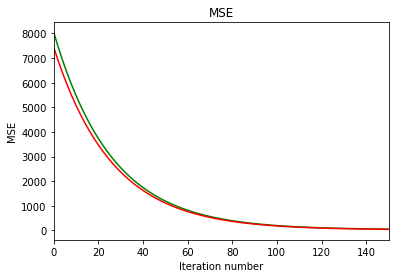

In [125]:
plt.plot(range(len(w_standart)), w_standart,color='g')
plt.plot(range(len(w_sgd)), w_sgd,color='r')
plt.xlim(0,150)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

При использовании sgd сходимость идет быстрее, хоть и не значительно. На больших объемах данных разница будет более заметна, скорее всего.

In [141]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-5):
    errors = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)+ lambda_ * W))

#         if i % (iterations / 10) == 0:
#             print(i, W, err)
        errors.append(err)
    return errors

In [142]:
def eval_sgd_model_reg2(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_=1e-5):
    errors = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)+ lambda_ * W))
  

        errors.append(err)
    return errors

In [143]:
w_standart_reg2 = eval_model_reg2(X, y, iterations=1000, alpha=1e-2)
w_sgd_reg2 = eval_sgd_model_reg2(X, y, iterations=1000, qty_in_batch=128, alpha=1e-2)

Text(0, 0.5, 'MSE')

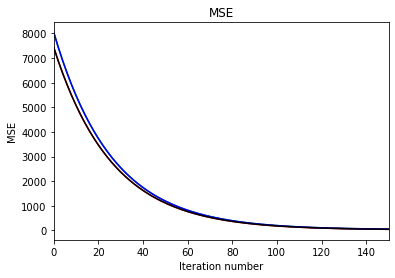

In [144]:
plt.plot(range(len(w_standart)), w_standart,color='g')
plt.plot(range(len(w_sgd)), w_sgd,color='r')
plt.plot(range(len(w_standart_reg2)), w_standart,color='b')
plt.plot(range(len(w_sgd_reg2)), w_sgd,color='black')

plt.xlim(0,150)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [145]:
w_standart[-1]

26.425904860870762

In [146]:
w_sgd[-1]

19.688517650107766

In [147]:
w_standart_reg2[-1]

26.425905084929337

In [148]:
w_sgd_reg2[-1]

19.688145929103026

Практически нет отличий, но на данной выборке нет больших выбросов по этому это закономерно. 